In [1]:
# BirthISo = {"USA":"USA" , "Germany" : "DEU" ,"Finland":"FIN" ,"Canada":"CAN" ,"Australia" :"AUS" ,"UK":"GBR","Bosnia and Herzegovina":"BIH",
#             "South Korea": "KOR", "Romania" : "ROU" , "Sweden":"SWE" ,"Greece":"GRC" ,"Ireland" :"IRL" ,"Switzerland" :"CHE",
#             "Turkey":"TUR" ,"Bulgaria":"BGR","Belgium":"BEL","Latvia":"LVA","Austria":"AUT","South Africa":"ZAF","Croatia":"HRV",
#             "India":"IND","Netherlands":"NLD","Denmark":"DNK","Portugal":"PRT","France":"FRA","Argentina":"ARG","Colombia":"COL",
#             'Estonia':'EST', 'Russia':'RUS', 'Slovakia':'SVK', 'Lithuania':'LTU', 'Norway':'NOR','Singapore':'SGP', 'Poland':'POL', 'Italy':'ITA', 'Morocco':'MAR'
#             ,'Spain':'ESP', 'Saudi Arabia':'SAU','Czech Republic':'CZE', 'Georgia':'GEO', 'China':'CHN', 'Slovenia':'SVN', 'Jordan':'JOR',
#             'Brazil':'BRA', 'Venezuela':'VEN', 'Tunisia':'TUN', 'Israel':'ISR', 'Hong Kong':'HKG', 'Ukraine':'UKR',
#             'Mexico':'MEX', 'Hungary':'HUN', 'New Zealand':'NZL', 'Serbia':'SRB', 'Afghanistan':'AFG',
#             'Macedonia':'MKD', 'Montenegro':'MNE', 'Algeria':'DZA', 'Malaysia':'MYS', 'Philippines':'PHL',
#             'Japan':'JPN', 'Iceland':'ISL', 'Luxembourg':'LUX', 'Belarus':'BLR', 'Chile':'CHL',
#             'Puerto Rico':'PRI', 'Lebanon':'LBN', 'Vietnam':'VNM', 'Cyprus':'CYP', 'Kazakhstan':'KAZ',
#             'Sri Lanka':'LKA', 'Cuba':'CUB', 'Peru':'PER', 'Egypt':'EGY', 'Turkmenistan':'TKM', 'Namibia':'NAM',
#             'Uruguay':'URY', 'Pakistan':'PAK', 'Bangladesh':'BGD', 'Faroe Islands':'FRO', 'Syria':'SYR',
#             'Dominican Republic':'DOM', 'Nicaragua':'NIC', 'Thailand':'THA', 'Mauritius':'MUS',
#             'Ivory Coast':'CIV', 'Panama':'PAN', 'Ecuador':'ECU', 'United Arab Emirates':'ARE',
#             'Albania':'ALB', 'Trinidad & Tobago':'TTO', 'Costa Rica':'CRI', 'Liechtenstein':'LIE',
#             'Iraq':'IRQ', 'Azerbaijan':'AZE', 'Maldives':'MDV', 'Kyrgyzstan':'KGZ', 'Kuwait':'KWT',
#             'Somalia':'SOM', 'Guatemala':'GTM', 'Belize':'BLZ', 'Iran':'IRN',
#             'Jamaica':'JAM', 'Uzbekistan':'UZB', 'Nepal':'NPL', 'Kenya':'KEN', 'Malta':'MLT', 'Moldova':'MDA',
#             'El Salvador':"SLV", 'Libya':'LBY', 'Mongolia':'MNG', 'Honduras':'HND', 'Curaçao':'CUW',
#             'Greenland':'GRL', 'Zimbabwe':'ZWE', 'Nigeria':'NGA', 'Bahrain':'BHR', 'Bolivia':'BOL',
#             'Ethiopia':'ETH', 'Fiji':'FJI', 'Indonesia':'IDN', 'St Vincent':'VCT', 'Gibraltar':'GIB',
#             'Brunei':'BRN', 'Macau':'MAC'
            
# }


### Import important libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.metrics import r2_score , mean_squared_error ,confusion_matrix,accuracy_score
import string as st
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Read Dataframe

In [3]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',200)
df = pd.read_csv('GamingStudy_data.csv' , encoding = 'ISO-8859-1')

In [4]:
df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [5]:
df.drop(['S. No.' , 'Timestamp'] , axis = 1 , inplace = True)

### Summarize dataframe

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GAD1,13464.0,0.860963,0.926542,0.0,0.0,1.0,1.0,3.0
GAD2,13464.0,0.673351,0.915724,0.0,0.0,0.0,1.0,3.0
GAD3,13464.0,0.965761,0.982776,0.0,0.0,1.0,2.0,3.0
GAD4,13464.0,0.724079,0.921971,0.0,0.0,0.0,1.0,3.0
GAD5,13464.0,0.488042,0.837014,0.0,0.0,0.0,1.0,3.0
GAD6,13464.0,0.911022,0.931168,0.0,0.0,1.0,1.0,3.0
GAD7,13464.0,0.588755,0.894408,0.0,0.0,0.0,1.0,3.0
SWL1,13464.0,3.720440,1.736264,1.0,2.0,4.0,5.0,7.0
SWL2,13464.0,4.602050,1.696276,1.0,3.0,5.0,6.0,7.0
SWL3,13464.0,4.345440,1.809430,1.0,3.0,5.0,6.0,7.0


In [7]:
df.dtypes

GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                object
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                object
Platform            object
Hours              float64
earnings            object
whyplay             object
League              object
highestleague      float64
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
SPIN15             float64
SPIN16             float64
S

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAD1             13464 non-null  int64  
 1   GAD2             13464 non-null  int64  
 2   GAD3             13464 non-null  int64  
 3   GAD4             13464 non-null  int64  
 4   GAD5             13464 non-null  int64  
 5   GAD6             13464 non-null  int64  
 6   GAD7             13464 non-null  int64  
 7   GADE             12815 non-null  object 
 8   SWL1             13464 non-null  int64  
 9   SWL2             13464 non-null  int64  
 10  SWL3             13464 non-null  int64  
 11  SWL4             13464 non-null  int64  
 12  SWL5             13464 non-null  int64  
 13  Game             13464 non-null  object 
 14  Platform         13464 non-null  object 
 15  Hours            13434 non-null  float64
 16  earnings         13464 non-null  object 
 17  whyplay     

In [9]:
df.isnull().sum()

GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1838
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23
Gender                 0


### Some values analysis

In [10]:
for i in df:
    print('-------------')
    print(df[i].value_counts().head(15))
    print('-------------')

-------------
0    5694
1    5099
2    1520
3    1151
Name: GAD1, dtype: int64
-------------
-------------
0    7616
1    3576
2    1326
3     946
Name: GAD2, dtype: int64
-------------
-------------
0    5319
1    4708
2    2016
3    1421
Name: GAD3, dtype: int64
-------------
-------------
0    7129
1    3884
2    1488
3     963
Name: GAD4, dtype: int64
-------------
-------------
0    9236
1    2576
2     961
3     691
Name: GAD5, dtype: int64
-------------
-------------
0    5386
1    4993
2    1982
3    1103
Name: GAD6, dtype: int64
-------------
-------------
0    8444
1    2961
2    1211
3     848
Name: GAD7, dtype: int64
-------------
-------------
Not difficult at all    6236
Somewhat difficult      5148
Very difficult          1012
Extremely difficult      419
Name: GADE, dtype: int64
-------------
-------------
2    3043
5    2727
6    2218
3    2099
4    1625
1    1333
7     419
Name: SWL1, dtype: int64
-------------
-------------
6    3715
5    2869
4    1724
3    1660
2  

In [11]:
for i in df:
    print('------',i,'------')
    print(df[i].unique()[:30])
    print('-------------')

------ GAD1 ------
[0 1 2 3]
-------------
------ GAD2 ------
[0 2 1 3]
-------------
------ GAD3 ------
[0 2 3 1]
-------------
------ GAD4 ------
[0 2 3 1]
-------------
------ GAD5 ------
[1 0 2 3]
-------------
------ GAD6 ------
[0 1 3 2]
-------------
------ GAD7 ------
[0 1 2 3]
-------------
------ GADE ------
['Not difficult at all' 'Somewhat difficult' 'Very difficult' nan
 'Extremely difficult']
-------------
------ SWL1 ------
[3 2 5 7 6 1 4]
-------------
------ SWL2 ------
[5 6 2 4 3 7 1]
-------------
------ SWL3 ------
[5 2 4 3 6 7 1]
-------------
------ SWL4 ------
[5 2 3 6 1 7 4]
-------------
------ SWL5 ------
[5 1 2 3 7 6 4]
-------------
------ Game ------
['Skyrim' 'Other' 'World of Warcraft' 'League of Legends' 'Starcraft 2'
 'Counter Strike' 'Destiny' 'Diablo 3' 'Heroes of the Storm' 'Hearthstone'
 'Guild Wars 2']
-------------
------ Platform ------
['Console (PS, Xbox, ...)' 'PC' 'Smartphone / Tablet']
-------------
------ Hours ------
[15.  8.  0. 20.  4. 3

In [12]:
for i in df:
    print('------',i,'------')
    print(df[i].nunique())
    print('-------------')

------ GAD1 ------
4
-------------
------ GAD2 ------
4
-------------
------ GAD3 ------
4
-------------
------ GAD4 ------
4
-------------
------ GAD5 ------
4
-------------
------ GAD6 ------
4
-------------
------ GAD7 ------
4
-------------
------ GADE ------
4
-------------
------ SWL1 ------
7
-------------
------ SWL2 ------
7
-------------
------ SWL3 ------
7
-------------
------ SWL4 ------
7
-------------
------ SWL5 ------
7
-------------
------ Game ------
11
-------------
------ Platform ------
3
-------------
------ Hours ------
84
-------------
------ earnings ------
314
-------------
------ whyplay ------
407
-------------
------ League ------
1455
-------------
------ highestleague ------
0
-------------
------ streams ------
65
-------------
------ SPIN1 ------
5
-------------
------ SPIN2 ------
5
-------------
------ SPIN3 ------
5
-------------
------ SPIN4 ------
5
-------------
------ SPIN5 ------
5
-------------
------ SPIN6 ------
5
-------------
------ SPIN7 

## Cleaning

In [13]:
df['Hours_streams'] = df['Hours']+df['streams']
df.drop(  ((df[df['Hours_streams'] > 116].index) | (df[df['Hours_streams']==0].index)),
                                             axis=0,inplace=True)

C:\Users\Eyad\AppData\Local\Temp\ipykernel_14628\116929679.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df.drop(  ((df[df['Hours_streams'] > 116].index) | (df[df['Hours_streams']==0].index)),


In [14]:
df.GADE.fillna(df.GADE.mode()[0] , inplace=True) #1

In [15]:
df.streams.fillna(int(df.streams.mean()) , inplace = True)
df.Hours.fillna(int(df.Hours.mean()) , inplace = True)

In [16]:
df.League.nunique()

1444

In [17]:
df.League = df.League.str.lower().str.strip()
df.League.nunique()

1199

In [18]:
df.loc[(df['whyplay']== 'having fun') ,'League'] =df.loc[(df['whyplay']== 'having fun') ,'League'].fillna('unranked')
df.League.fillna('gold' , inplace = True)

In [19]:
df["League"] =df["League"].str.extract(r'^([a-z]+)')

In [20]:
df.League.nunique()

207

In [21]:
golds = ['g', 'gv', 'golden' ,'glod' ,'golld' ,'golf', 'goled', 'golderino' ,'giii']
df['League'] = df.League.replace(golds , 'gold')

In [22]:
silvers = [ 'silverii' , 's' , 'sliver' , 'siver' , 'silber' , 'sil' , 'silveriv']
df['League'] = df.League.replace(silvers , 'silver')

In [23]:
plats = [
    'platinium' , 'platnium' , 'platin' ,'pplatinum' ,'plarinum' ,'platium', 'p' ,'platine' ,
    'platinun' ,'platonum' ,'platnum', 'plata' ,'plantinum',
    'platinuim' ,'platunum', 'plantinum' ,'platunum' ,'platinumm' ,'platv' ,'platina' , 'plat' 
]
df['League'] = df.League.replace(plats , 'platinum')

In [24]:
bronzers = ['bronce' , 'b' , 'broze' ,'lowest' , 'wood', 'elohell'] 
df['League'] = df.League.replace(bronzers , 'bronze')

In [25]:
unranked = ['none' ,'na', 'not' ,'n' ,'promos' ,'provisional' ,'placements' , 'dont' , 'was', 'unraked',
            'havent', 'never', 'nope', 'no', 'noone', 'don', 'of', 'unrranked', 'new', 'what', 'unrank' ,
            'ranked', 'placement', 'unrankt' , 'non', 'unfranked' , 'promotion', 'idk',
            'unplaced', 'probably', 'provisionals', 'didnt' ,'unrakned' , 'unfinished' , 'just' , 'x' ,
            'promotions' , 'unseeded' , 'haven']
df['League'] = df.League.replace(unranked , 'unranked')

In [26]:
diamonds =  ['d', 'dia', 'diaomnd', 'diamont','diamomd']
df['League'] = df.League.replace(diamonds , 'diamond')

In [27]:
chall =  ['challenjour', 'c', 'charrenjour', 'challeneger']
df['League'] = df.League.replace(chall , 'challenger')

In [28]:
gm =  ['grand', 'gm', 'grandmasters']
df['League'] = df.League.replace(gm , 'grandmaster')

In [29]:
df['League'] = df.League.replace('mg' , 'mge')
df['League'] = df.League.replace('masters' , 'master')
df['League'] = df.League.replace( ['le', 'legdendary'] , 'legendary')

In [30]:
df.League.value_counts()

gold             4045
platinum         2640
silver           2278
unranked         1692
diamond          1628
bronze            552
master            163
challenger         76
rank               28
i                  20
grandmaster        17
currently          11
dmg                11
mge                 8
high                8
season              8
legendary           8
lol                 7
league              7
still               7
in                  7
top                 6
cs                  6
legend              6
nova                5
supreme             4
greater             4
last                3
csgo                3
lem                 3
starcraft           3
used                2
ugc                 2
peaked              2
sc                  2
finished            2
level               2
mid                 2
aram                2
eu                  2
the                 2
for                 2
division            2
low                 2
global              2
got       

In [31]:
counts = df['League'].value_counts()
df['League'] = df['League'][~df['League'].isin(counts[counts < 3].index)]

In [32]:
df['League'] = df.League.replace(['i' , 'currently' , 'high' , 'season' , 'lol','cs' ,
                                  'last' ,'csgo','starcraft' ,'geater' , 'in', 'rank' , 'still'] , np.nan)

In [33]:
df.League.fillna('unspecified' , inplace=True)

In [34]:
df.League.unique()

array(['unranked', 'gold', 'unspecified', 'diamond', 'bronze', 'silver',
       'legendary', 'master', 'platinum', 'challenger', 'top',
       'grandmaster', 'legend', 'dmg', 'league', 'nova', 'mge', 'supreme',
       'greater', 'lem'], dtype=object)

In [35]:
df.whyplay = df.whyplay.str.lower().str.strip()

In [36]:
print(df.earnings.value_counts().index[3:])

Index(['I play to win', 'i try', 'I play but don't have fun...',
       'I play because it is the only way i have to show i'm good at something',
       'I don't earn jack ****',
       'I play for relaxation and it gives me a few minutes to release everything ',
       'making money from boosting,but mostly fun',
       'I play because it's installed', 'competitive drive', 'Fun and routine',
       ...
       'I play for fun, but also trying to get good at the game',
       'i would love to make money by playing some day',
       'I play hoping one day I can be good enough to make a living out of it',
       'It is an escape and only thing I can do with my life at the moment.',
       'I play for fun, but if there's an opportunity to earn some money, I would love to.',
       'Keep in touch w/ friends',
       'I Play for fun and working on making earn out of it.',
       'I play ranked mostly',
       'I got paid to play halo series and gears of war series. started to play lol with t

In [37]:
print(df.whyplay.value_counts().index[5:])

Index(['improving and having fun', 'winning and improving',
       'having fun and improving', 'distraction', 'winning while having fun',
       'improving and winning', 'relaxing and having fun', 'wasting time',
       'winning and having fun', 'both relaxing and having fun',
       ...
       'individual performance and winning together',
       'all of the above with an emphasis on winning.',
       'both having fun and improving.',
       'i have fun when i see myself getting better at the game',
       'not feeling the pain my mind can inflict on me', 'occupation',
       'improving, relaxing and having fun are equally important to me and tied so close, that they cannot exist without each other (e.g. i can only have fun while relaxing and i always try to improve while relaxing and having fun),',
       'making my brain go numb', 'combination: winning / having fun',
       'mental priority is fun>improve>win, actual priority once in game win>improve>fun'],
      dtype='object', len

In [38]:
df['Playstyle'].unique()

array(['Singleplayer', 'Multiplayer - online - with strangers',
       'Multiplayer - online - with online acquaintances or teammates',
       'Multiplayer - online - with real life friends',
       'Multiplayer - offline (people in the same room)',
       'all of the above',
       'Multiplayer - Online - With real friends, and with online acquaintances, and strangers',
       'With strangers and friends', 'Singleplayer - online', 'watching',
       ' Multiplayer - online - with online acquaintances or teammates and with real life friends',
       'Multiplayer - online with friends, teammates and strangers',
       'Sometimes alone (Ranked), sometimes with friends. Everytime there are strangers in my game ofc',
       'Multiplayer online, with friends (sometimes in the same room), sometimes with strangers.',
       'I prefer playing with RLF but I also play it to make a living.',
       'Multiplayer - online - with strangers or real life friends',
       'Multiplayer - online with onl

In [39]:
df['Narcissism'].fillna(df['Narcissism'].mode()[0],inplace=True)

In [40]:
df.drop(["Birthplace","Birthplace_ISO3"],axis=1,inplace=True)

In [41]:
df['Residence'] = df['Residence'].replace('Unknown',df['Residence'].mode()[0])

In [42]:
df['Reference'].fillna('Other',inplace=True)

In [43]:
df.drop(df[df['accept'].isnull()].index , axis=0 , inplace=True)


In [44]:
df['Residence_ISO3'].fillna('USA',inplace=True) #11063

In [45]:
df.loc[11063,'Residence_ISO3'] = 'XXK'

In [46]:
col = ['SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9',
     'SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17' ,'SPIN_T']
for i in col :
    df[i].fillna(df[i].mode()[0], inplace = True)

In [47]:
df['Playstyle'] = df['Playstyle'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['earnings'] = df['earnings'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['whyplay'] = df['whyplay'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))


In [48]:
df['Playstyle'] = df['Playstyle'].str.lower().str.strip()
df['whyplay'] = df['whyplay'].str.lower().str.strip()
df['earnings'] = df['earnings'].str.lower().str.strip()

In [49]:
df['Playstyle'].nunique()

278

In [50]:
df.drop('highestleague' , axis = 1 , inplace = True)

In [51]:
df.head(7)

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Hours_streams
0,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,i play for fun,having fun,unranked,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,Reddit,singleplayer,Accept,1,23,5.0,USA,15.0
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,i play for fun,having fun,unranked,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,Reddit,multiplayer online with strangers,Accept,8,16,33.0,USA,10.0
3,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,i play for fun,improving,gold,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,Reddit,multiplayer online with online acquaintances...,Accept,0,17,11.0,USA,25.0
4,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,i play for fun,having fun,unranked,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),South Korea,Reddit,multiplayer online with strangers,Accept,14,14,13.0,KOR,21.0
5,0,0,0,0,0,1,0,Not difficult at all,3,5,3,3,3,Other,"Console (PS, Xbox, ...)",4.0,i play for fun,relaxing,unspecified,0.0,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,Male,24,Employed,Bachelor (or equivalent),USA,Reddit,multiplayer online with real life friends,Accept,1,17,13.0,USA,4.0
6,0,0,0,0,0,0,0,Not difficult at all,3,4,4,3,2,Other,PC,30.0,i play for fun,relaxing,gold,8.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,Male,29,Employed,High school diploma (or equivalent),USA,Reddit,multiplayer online with online acquaintances...,Accept,0,16,26.0,USA,38.0
7,0,0,0,0,0,0,0,Not difficult at all,3,6,4,3,7,Other,"Console (PS, Xbox, ...)",25.0,i play for fun,having fun,unranked,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Female,23,Employed,Bachelor (or equivalent),Japan,Reddit,singleplayer,Accept,0,23,14.0,JPN,25.0


In [52]:
df.isnull().sum()

GAD1                0
GAD2                0
GAD3                0
GAD4                0
GAD5                0
GAD6                0
GAD7                0
GADE                0
SWL1                0
SWL2                0
SWL3                0
SWL4                0
SWL5                0
Game                0
Platform            0
Hours               0
earnings            0
whyplay             0
League              0
streams             0
SPIN1               0
SPIN2               0
SPIN3               0
SPIN4               0
SPIN5               0
SPIN6               0
SPIN7               0
SPIN8               0
SPIN9               0
SPIN10              0
SPIN11              0
SPIN12              0
SPIN13              0
SPIN14              0
SPIN15              0
SPIN16              0
SPIN17              0
Narcissism          0
Gender              0
Age                 0
Work               37
Degree              0
Residence           0
Reference           0
Playstyle           0
accept    

In [53]:
df['Hours_streams'].fillna(df['Hours_streams'].median(),inplace=True)
df.Work.fillna(df.Work.mode()[0] , inplace=True)

In [54]:
df.drop(['Residence' , 'accept'] , axis = 1 , inplace = True)

In [55]:
df['Playstyle'].value_counts()

multiplayer  online  with real life friends                                                                          5429
multiplayer  online  with strangers                                                                                  3969
multiplayer  online  with online acquaintances or teammates                                                          2545
singleplayer                                                                                                          720
multiplayer  offline people in the same room                                                                           44
                                                                                                                     ... 
a mix between rl friends and with strangers depends how im feeling                                                      1
multiplayer 2&3                                                                                                         1
multiplayer-online acqua

In [56]:
df['whyplay'].value_counts()

having fun                                                                         5138
improving                                                                          4729
winning                                                                            2018
relaxing                                                                            630
all of the above                                                                     56
                                                                                   ... 
all of the above with an emphasis on winning                                          1
both having fun and improving                                                         1
i have fun when i see myself getting better at the game                               1
not feeling the pain my mind can inflict on me                                        1
mental priority is fun>improve>win actual priority once in game win>improve>fun       1
Name: whyplay, Length: 341, dtyp

In [57]:
df['earnings'].value_counts()

i play for fun                                                                           11709
i play mostly for fun but earn a little on the side tournament winnings streaming etc      957
i earn a living by playing this game                                                        39
i play to win                                                                                4
i play to improve                                                                            2
                                                                                         ...  
i play for fun but if there's an opportunity to earn some money i would love to              1
keep in touch w friends                                                                      1
i play for fun and working on making earn out of it                                          1
i play ranked mostly                                                                         1
strive to be pro                                  

In [58]:
df.dtypes

GAD1                int64
GAD2                int64
GAD3                int64
GAD4                int64
GAD5                int64
GAD6                int64
GAD7                int64
GADE               object
SWL1                int64
SWL2                int64
SWL3                int64
SWL4                int64
SWL5                int64
Game               object
Platform           object
Hours             float64
earnings           object
whyplay            object
League             object
streams           float64
SPIN1             float64
SPIN2             float64
SPIN3             float64
SPIN4             float64
SPIN5             float64
SPIN6             float64
SPIN7             float64
SPIN8             float64
SPIN9             float64
SPIN10            float64
SPIN11            float64
SPIN12            float64
SPIN13            float64
SPIN14            float64
SPIN15            float64
SPIN16            float64
SPIN17            float64
Narcissism        float64
Gender      

In [59]:
df.earnings.replace(df.earnings.value_counts().index[3:] , 'Other',inplace=True)
df['earnings'].value_counts()

i play for fun                                                                           11709
i play mostly for fun but earn a little on the side tournament winnings streaming etc      957
Other                                                                                      294
i earn a living by playing this game                                                        39
Name: earnings, dtype: int64

In [60]:
df.whyplay.replace(df.whyplay.value_counts().index[5:] , 'Other',inplace=True)
df['whyplay'].value_counts()

having fun          5138
improving           4729
winning             2018
relaxing             630
Other                428
all of the above      56
Name: whyplay, dtype: int64

In [61]:
df.Playstyle.replace(df.Playstyle.value_counts().index[5:] , 'Other',inplace=True)
df['Playstyle'].value_counts()

multiplayer  online  with real life friends                    5429
multiplayer  online  with strangers                            3969
multiplayer  online  with online acquaintances or teammates    2545
singleplayer                                                    720
Other                                                           292
multiplayer  offline people in the same room                     44
Name: Playstyle, dtype: int64

# EDA

In [62]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'

In [63]:
df.head(2)

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Hours_streams
0,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,i play for fun,having fun,unranked,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Reddit,singleplayer,1,23,5.0,USA,15.0
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,i play for fun,having fun,unranked,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Reddit,multiplayer online with strangers,8,16,33.0,USA,10.0


### Correlations

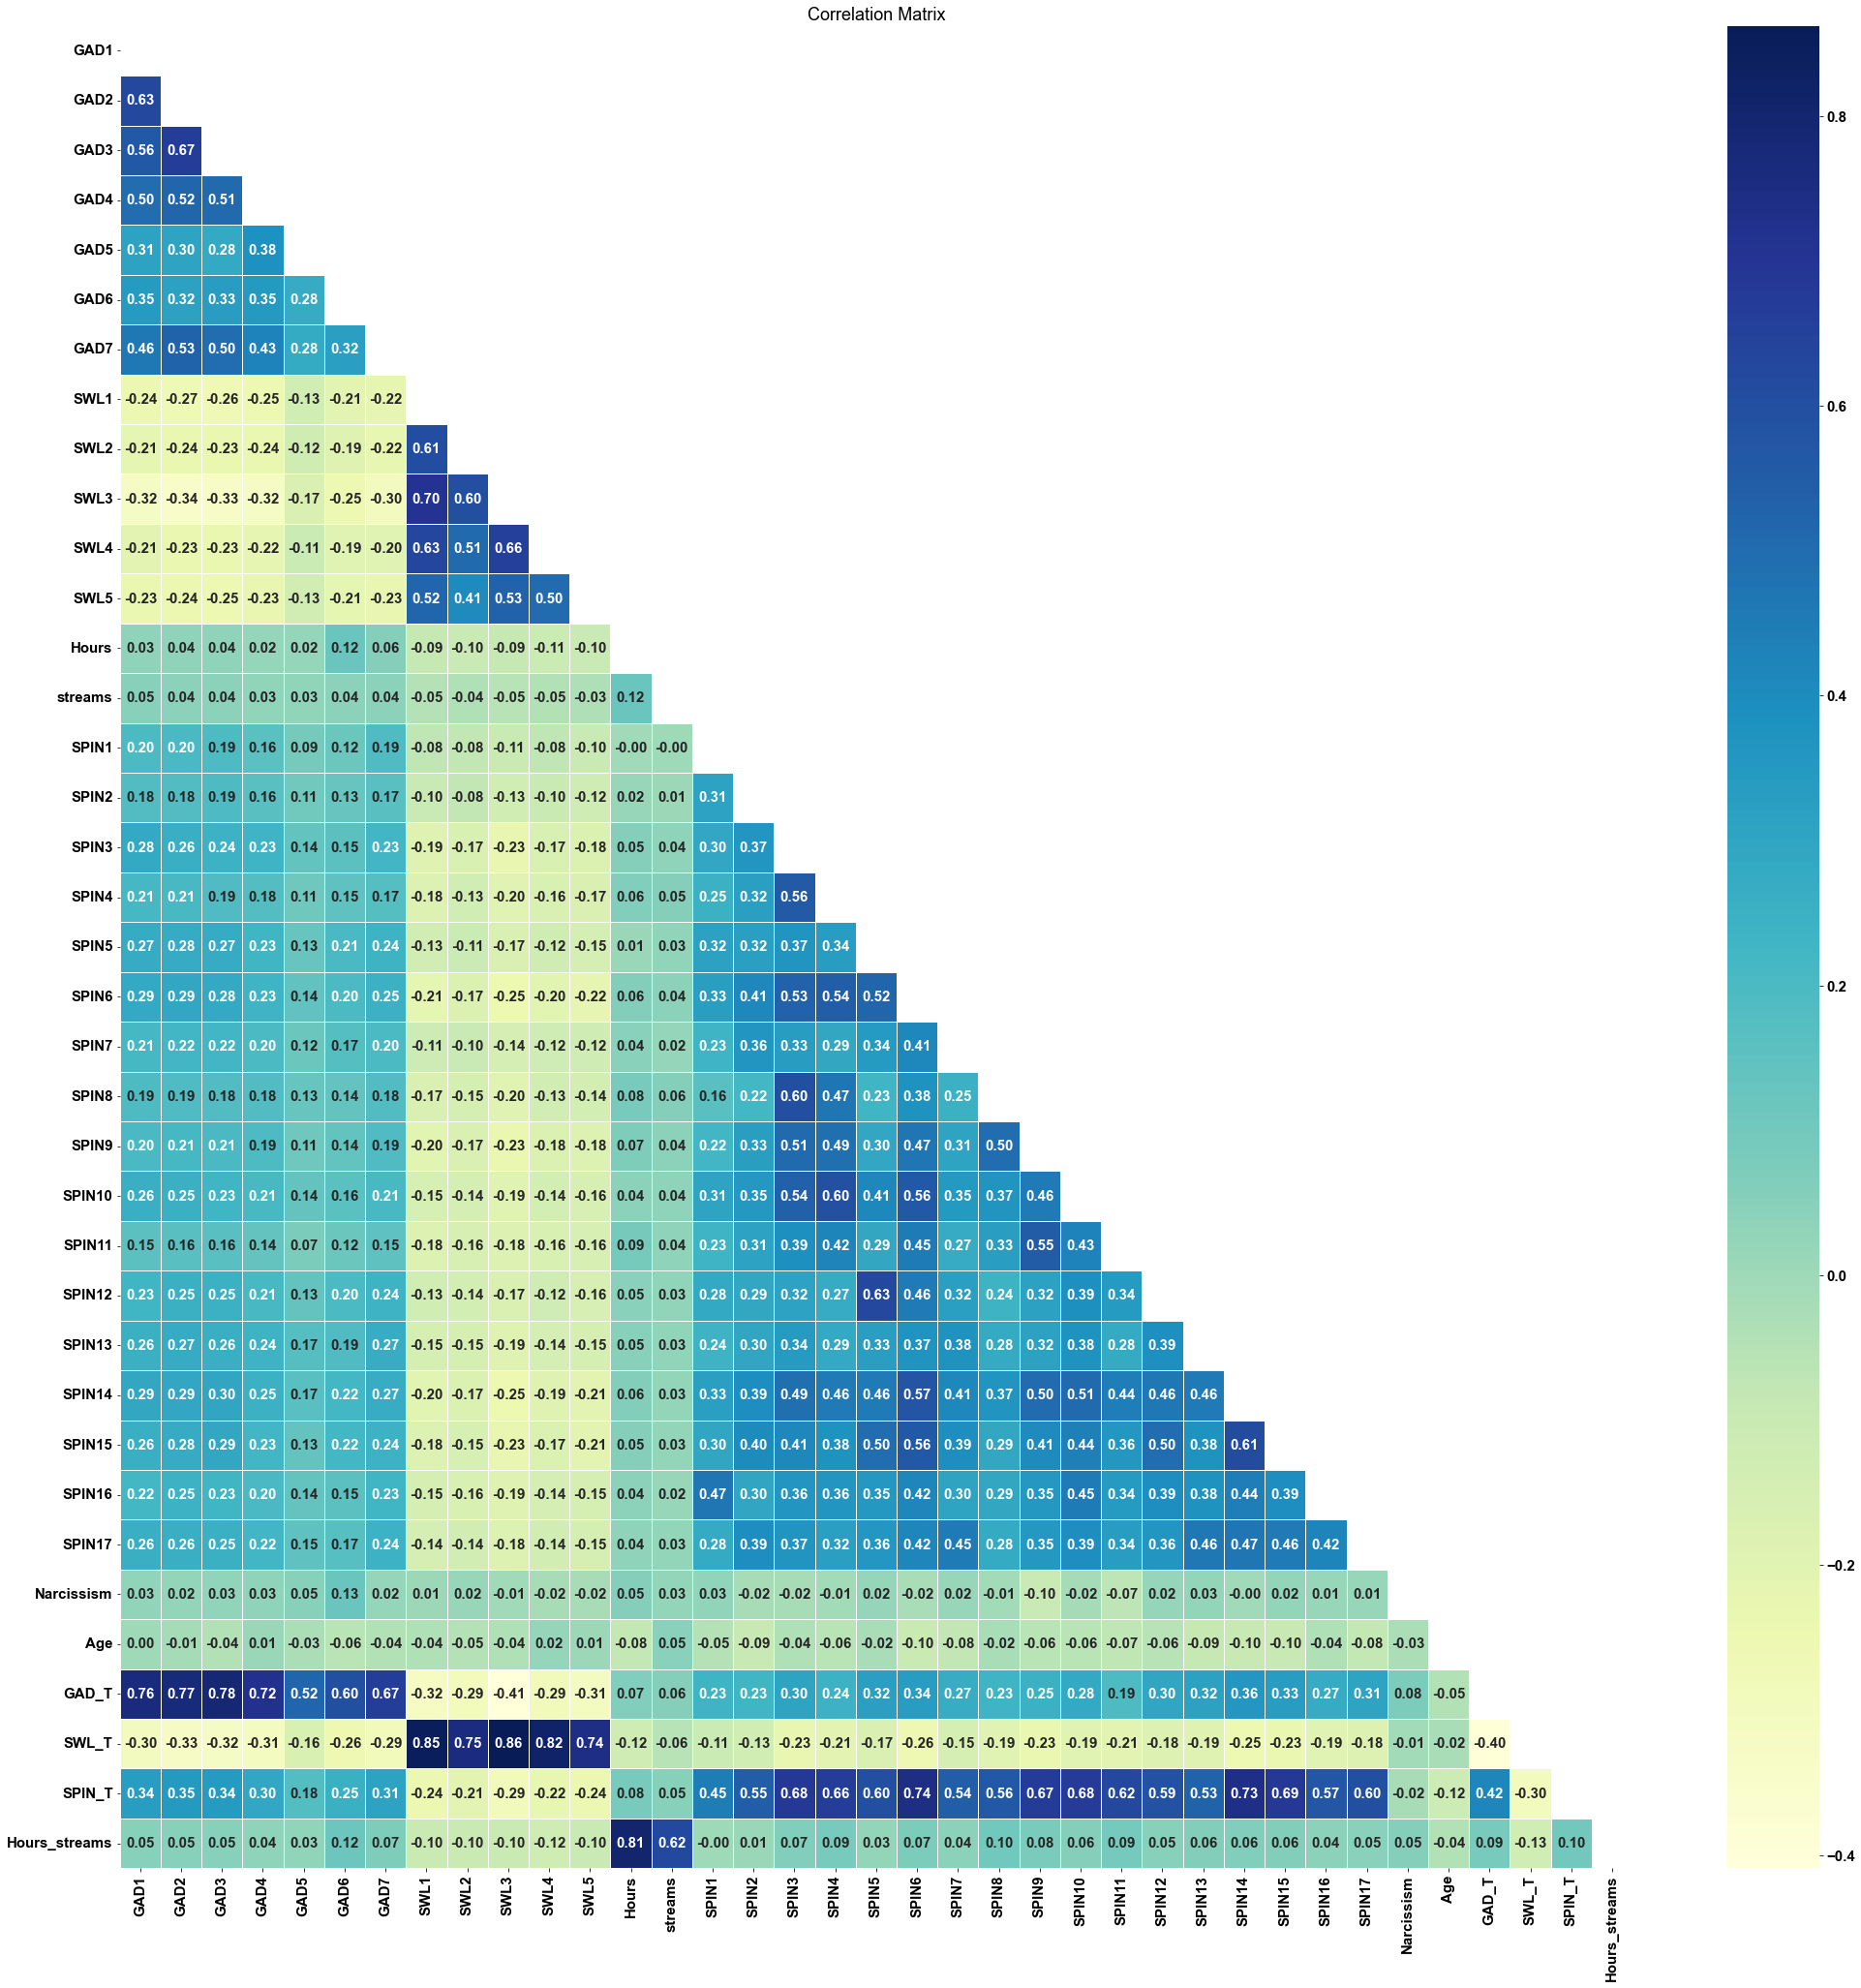

In [64]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

### Scores distribution

Text(0.5, 1.0, 'Narcissism')

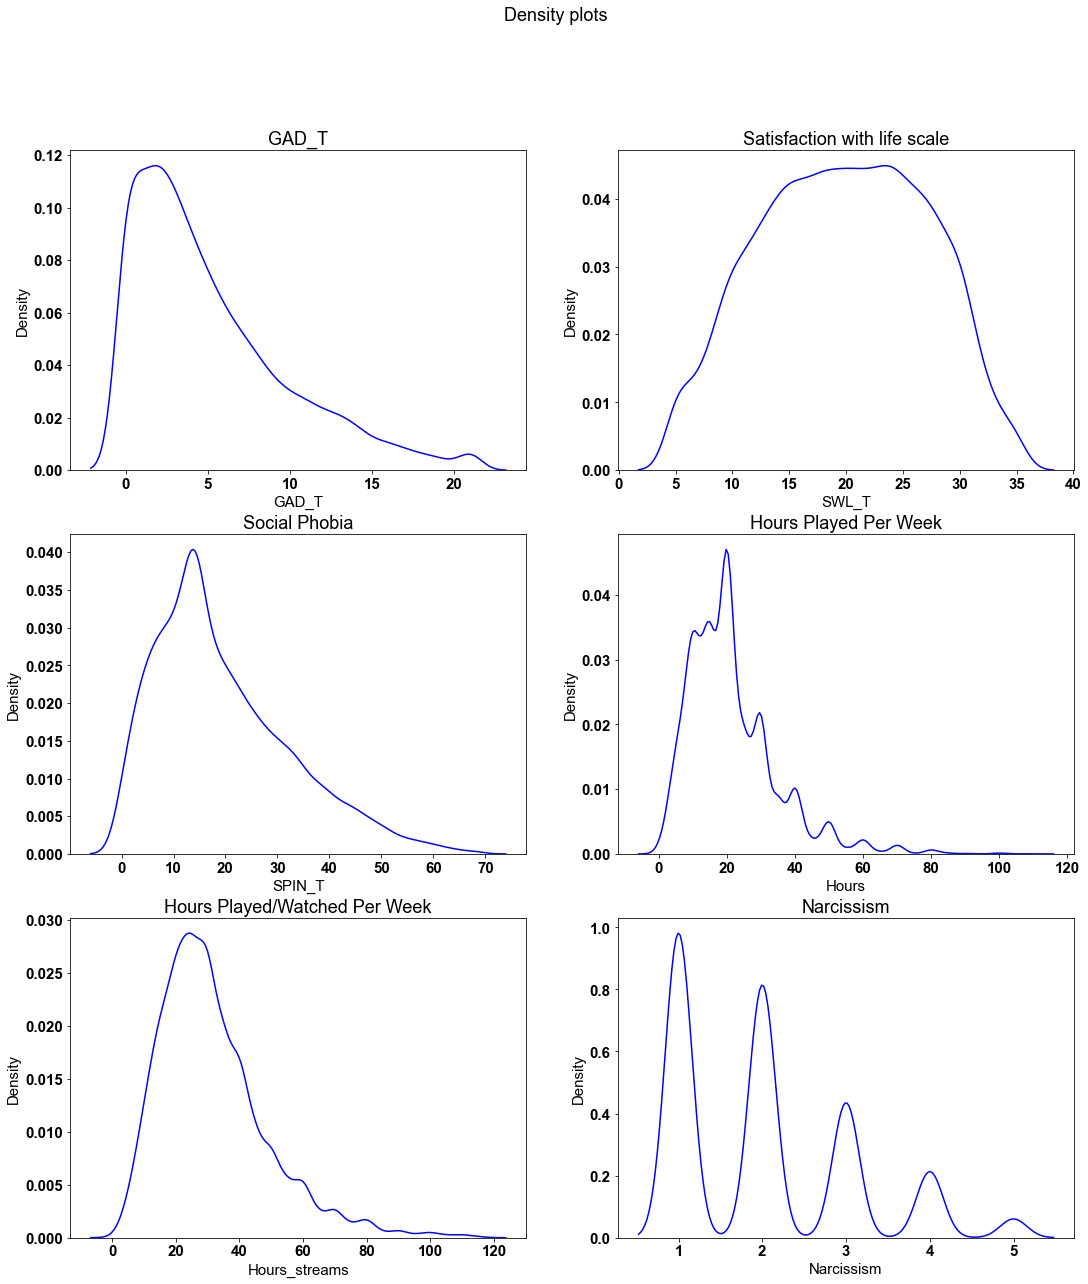

In [65]:
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
fig.suptitle('Density plots')

sns.kdeplot(df['GAD_T'] , c='b' , ax = axes[0][0])
axes[0][0].set_title('GAD_T')


sns.kdeplot(df['SWL_T'],c='b' , ax = axes[0][1])
axes[0][1].set_title('Satisfaction with life scale')

sns.kdeplot(df['SPIN_T'],c='b' , ax = axes[1][0])
axes[1][0].set_title('Social Phobia')


sns.kdeplot(df['Hours'],c='b' , ax = axes[1][1])
axes[1][1].set_title('Hours Played Per Week')

sns.kdeplot(df.Hours_streams,c='b' , ax = axes[2][0])
axes[2][0].set_title('Hours Played/Watched Per Week')

sns.kdeplot(df['Narcissism'],c='b' , ax = axes[2][1])
axes[2][1].set_title('Narcissism')

### Line plot Anxities vs hours played , watched

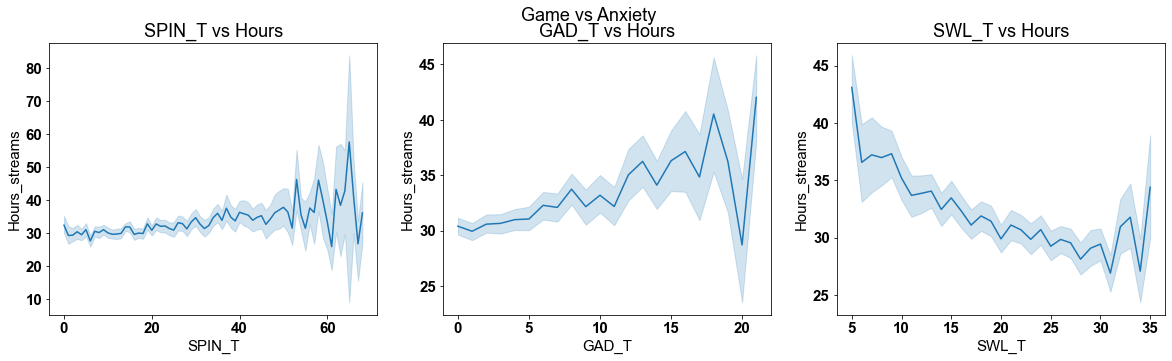

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    sns.lineplot(x=ele , y="Hours_streams", data=df , ax = axes[count])
    axes[count].set_title(f"{ele} vs Hours")

### some pie charts

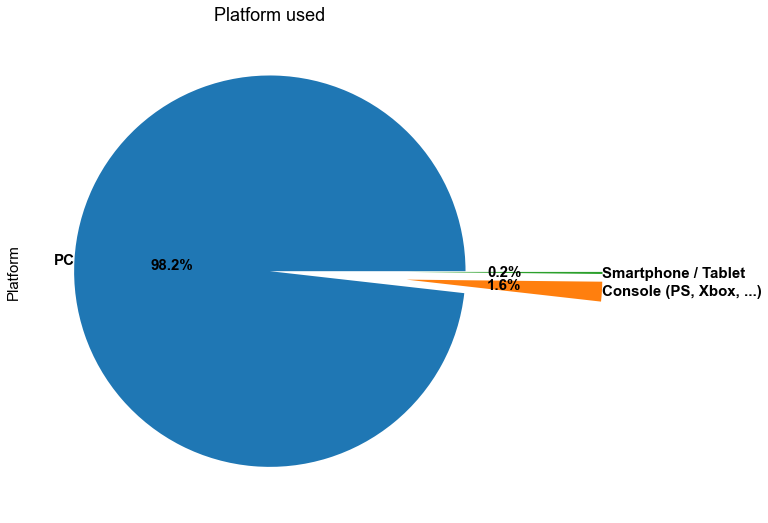

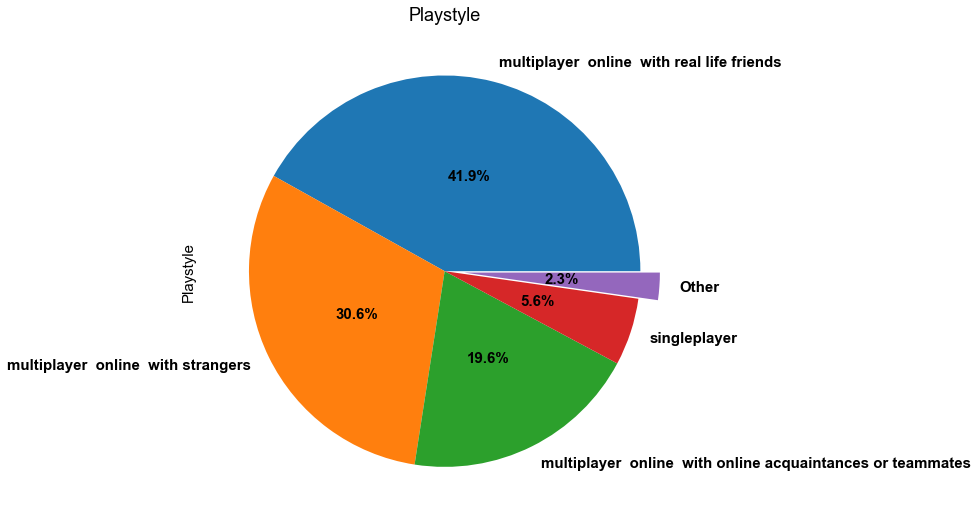

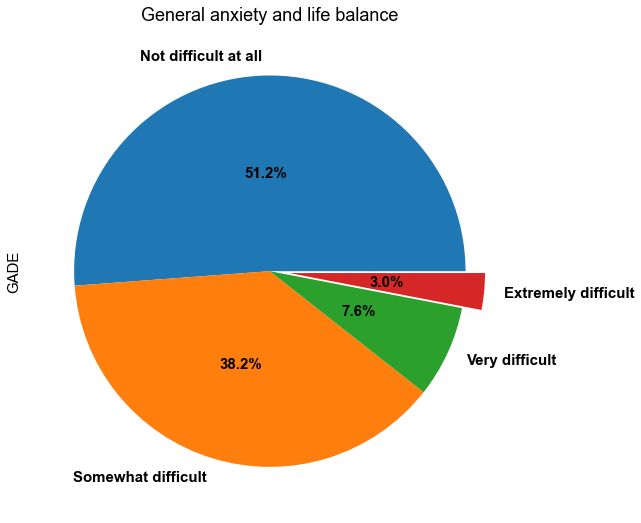

In [67]:
plt.figure(figsize=(9,9))
myexplode = [0, 0.7, 0.7]
df.Platform.value_counts().plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5, labeldistance=1 , explode=myexplode )
plt.title("Platform used")
plt.show()

plt.figure(figsize=(9,9))
myexplode = [0,0,0,0,0.1]
df.Playstyle.value_counts().head(5).plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5 , explode=myexplode )
plt.title("Playstyle")
plt.show()

plt.figure(figsize=(9,9))
myexplode = [0,0,0,0.1]
df.GADE.value_counts().head(5).plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5 , explode=myexplode )
plt.title("General anxiety and life balance")
plt.show()

### Game played vs total scores

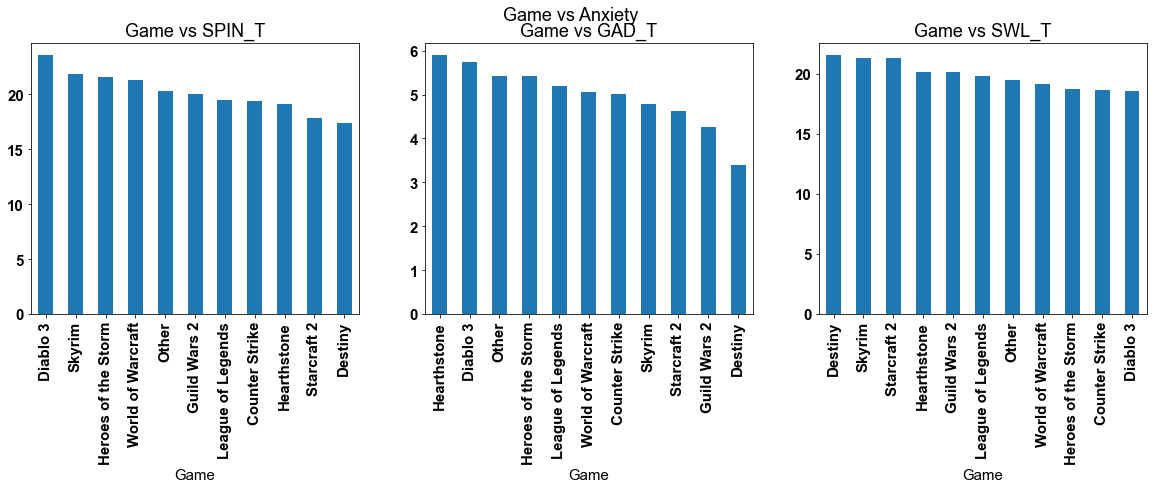

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    df.groupby('Game')[ele].mean().sort_values(ascending=False).plot(kind='bar' , ax = axes[count])
    axes[count].set_title(f"Game vs {ele}")

### Residence vs scores

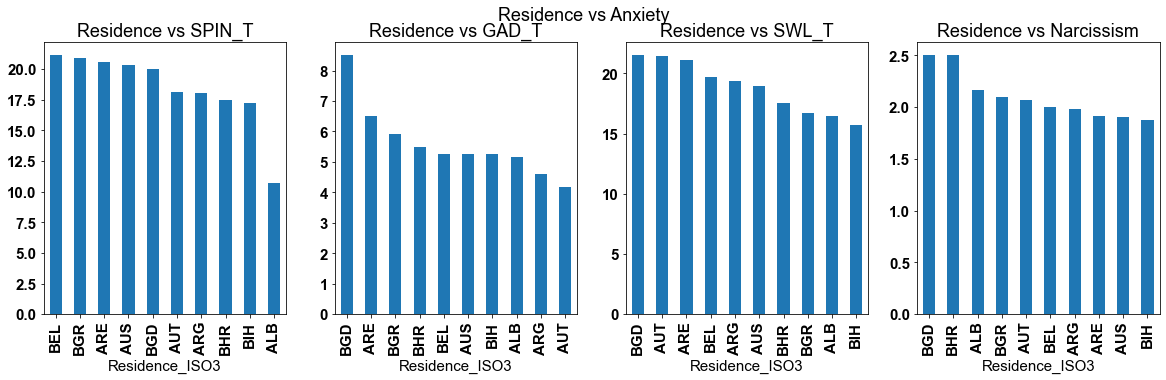

In [69]:
fig, axes = plt.subplots(1 , 4, figsize=(20, 5) )
fig.suptitle('Residence vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T' , 'Narcissism']

for count, ele in enumerate(labels):
    df.groupby('Residence_ISO3')[ele].mean().head(10).sort_values(ascending=False).plot(kind='bar' , ax = axes[count])
    axes[count].set_title(f"Residence vs {ele}")

In [70]:
df.drop([12117,10622] , axis = 0 , inplace=True)

In [ ]:
# earnings SWL , .. | whyplay SWL , .. | League SWL , .. | Game SWL , .. | League SWL , .. | League , Narcissism
# Work SWL , .. | Degree SWL , .. |  Playstyle SWL , .. | Age SWL , .. | ,
# Playstyle , Hours | Degree, Narcissim | , |Work, Narcissim | , | Playstyle , age | , |Narcsisst , hours |
# |earnings , Narcissim | , |League , hours | , | SWL , SPIN , GAD means in bar | , | GADE swl , spin ,gad|
# |Gade , hours| , |Gade , age| , | Degree , hours | , | residence , narcissim , hours |

### Time related EDA

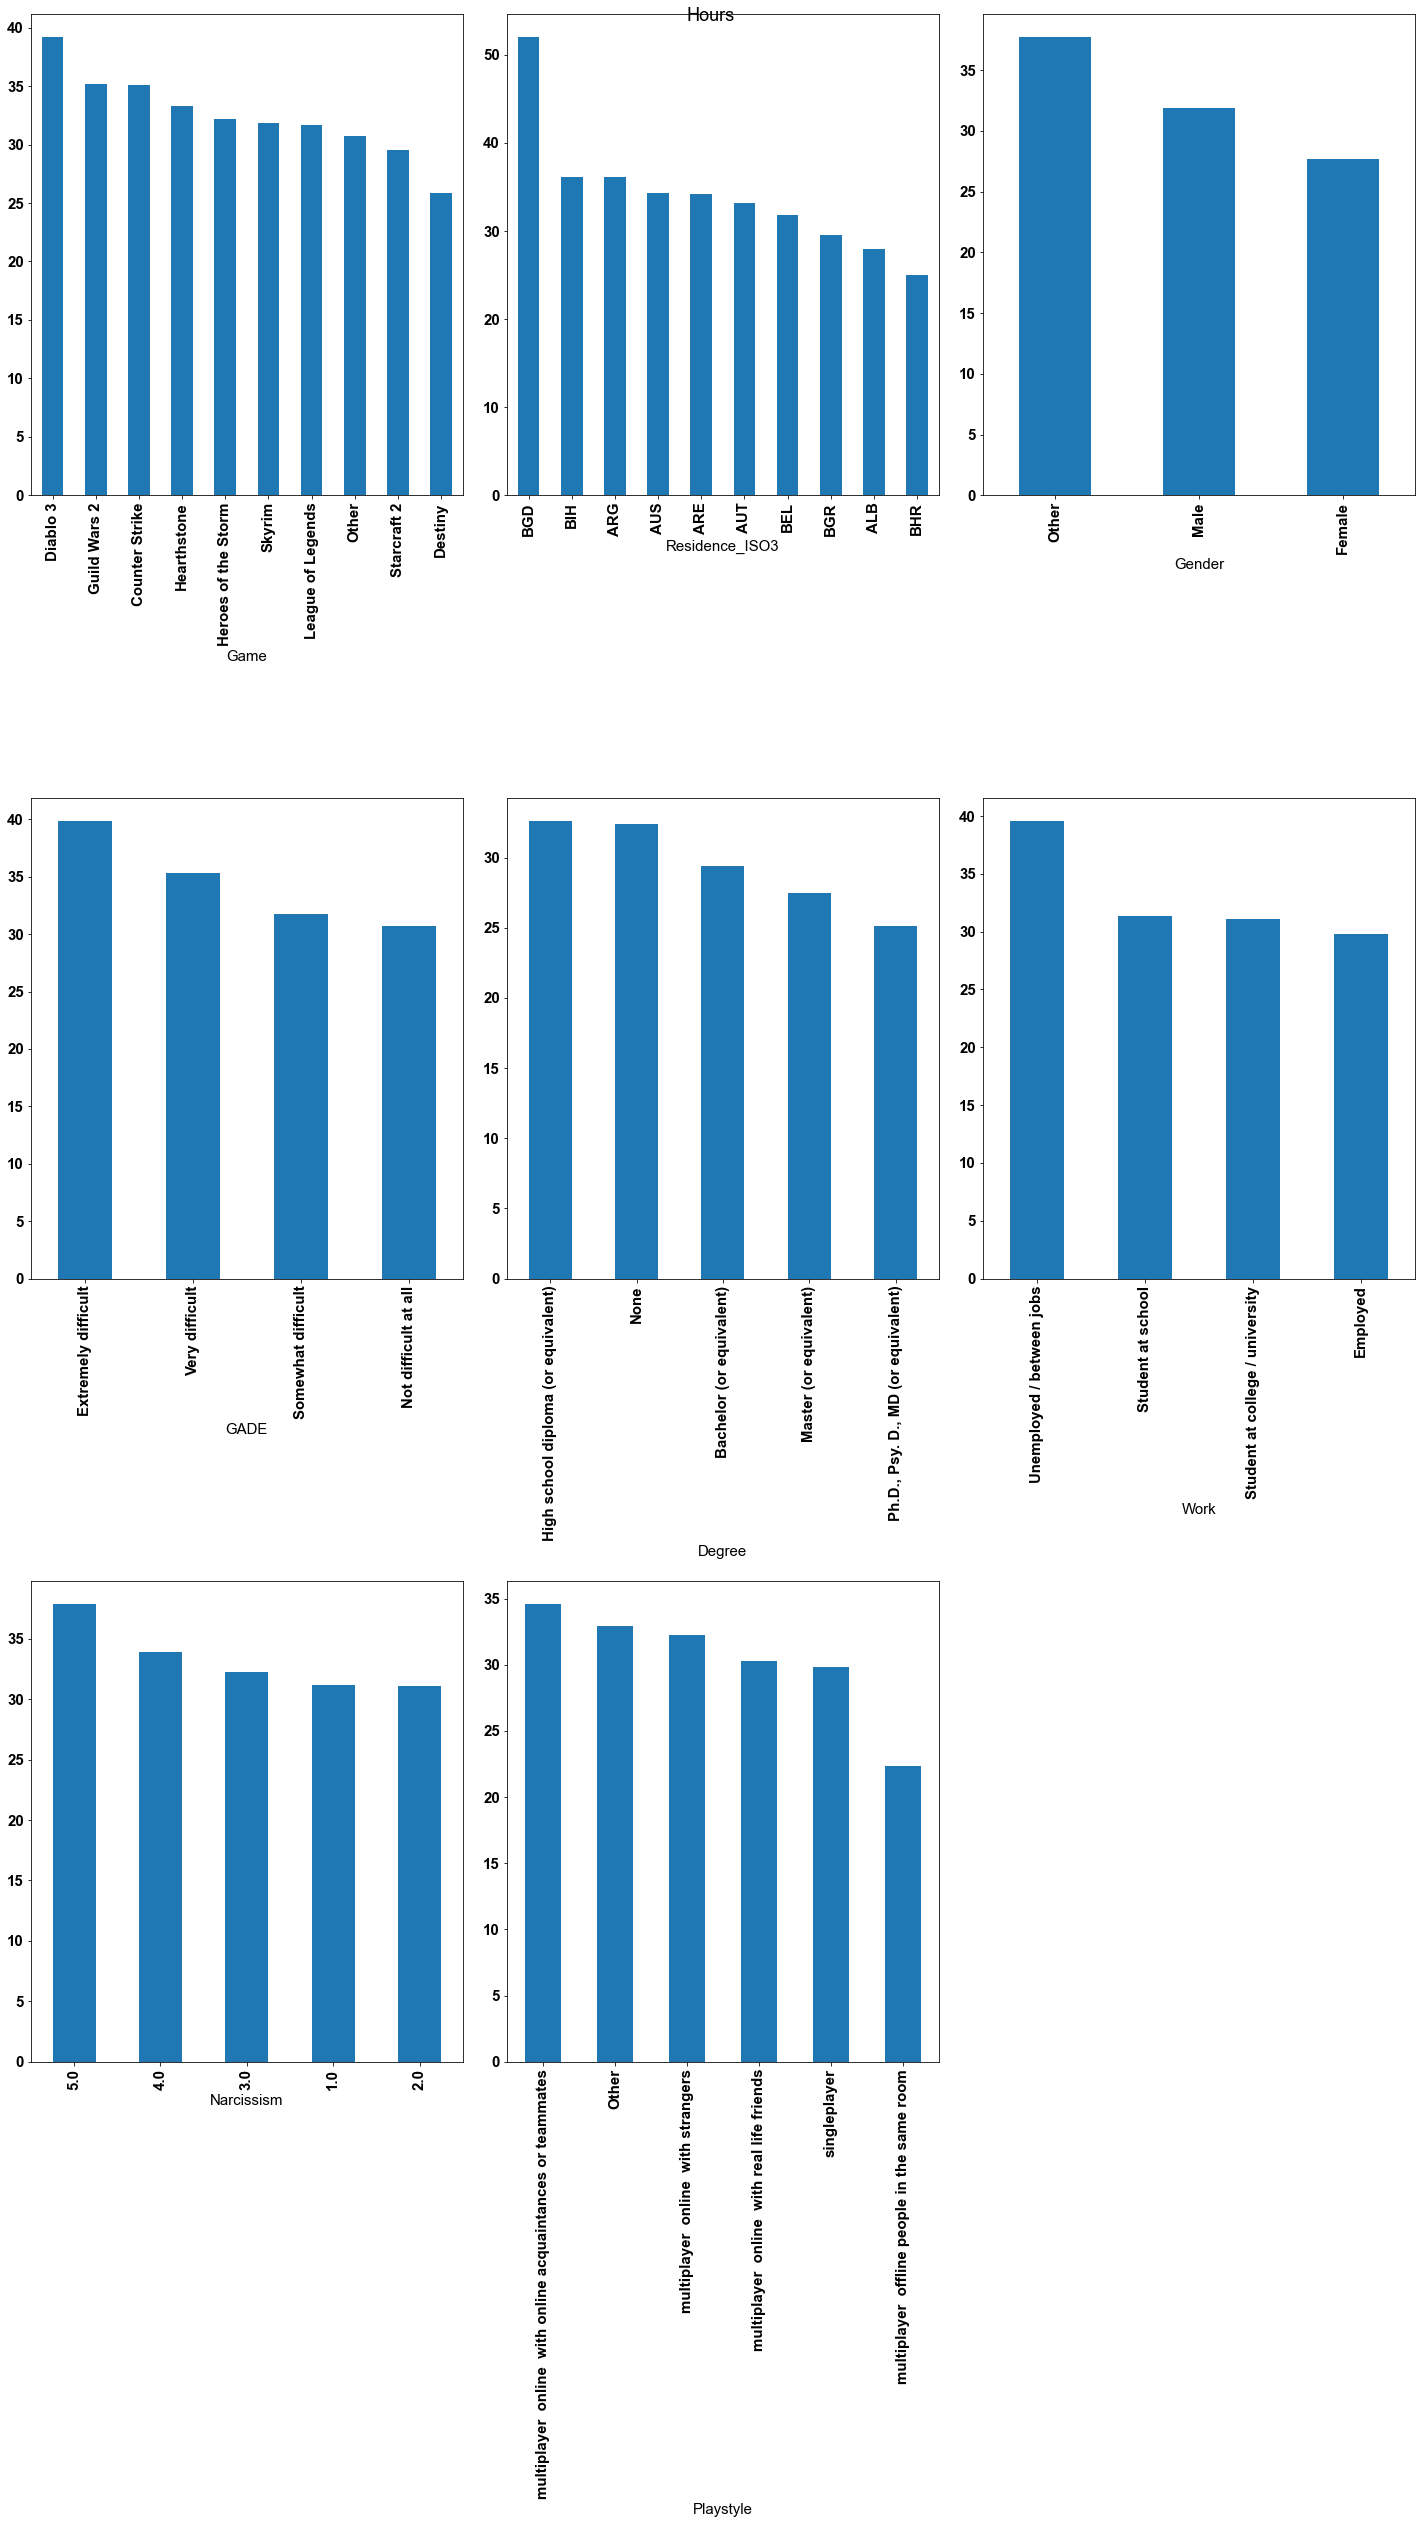

In [75]:
labels = ['Game', 'Residence_ISO3' , 'Gender','GADE' , 'Degree' , 'Work','Narcissism','Playstyle']
plt.figure(figsize=(20,30))
plt.suptitle('Hours')
for count, ele in enumerate(labels,1):
    plt.subplot(3 , 3 , count)
    plt.tight_layout()
    df.groupby(ele)['Hours_streams'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

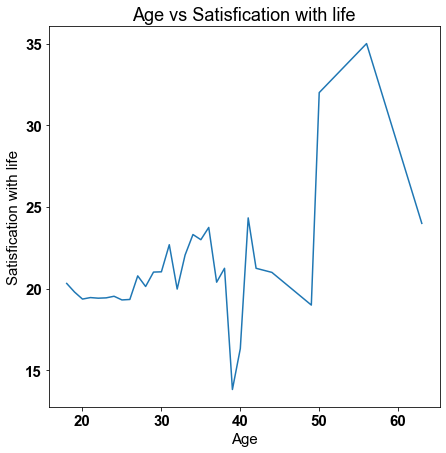

In [76]:
plt.figure(figsize=(7,7))
df.groupby('Age')['SWL_T'].mean().plot()
plt.title("Age vs Satisfication with life")
plt.xlabel("Age")
plt.ylabel("Satisfication with life");

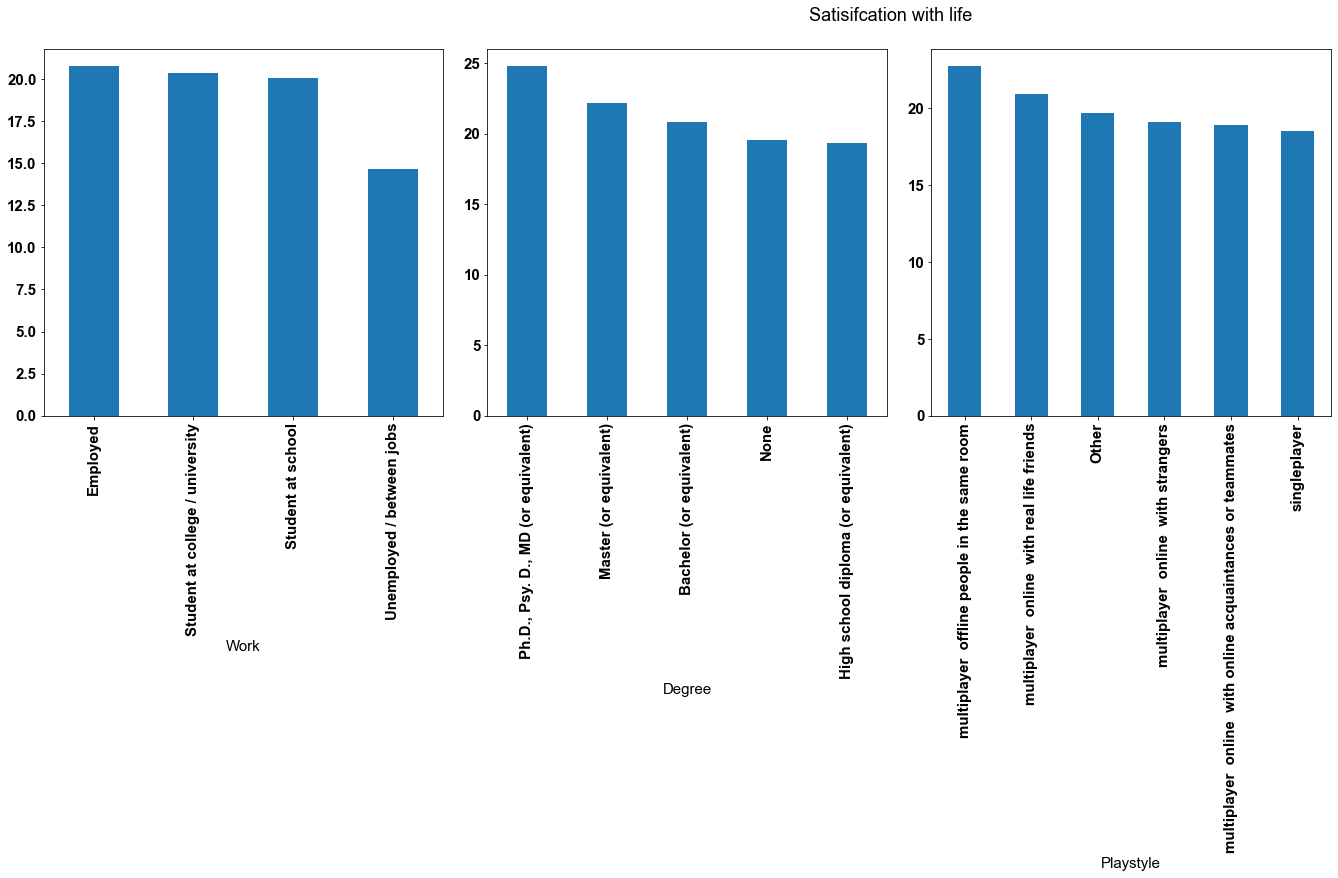

In [83]:
labels = ['Work', 'Degree' , 'Playstyle']
plt.figure(figsize=(25,10))
plt.suptitle('Satisifcation with life')
for count, ele in enumerate(labels,1):
    plt.subplot(1 , 4 , count)
    plt.tight_layout()
    df.groupby(ele)['SWL_T'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

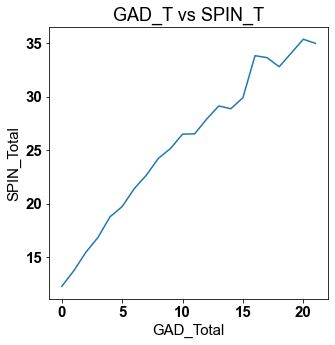

In [84]:
plt.figure(figsize=(5,5))
df.groupby('GAD_T')['SPIN_T'].mean().plot()
plt.title("GAD_T vs SPIN_T")
plt.xlabel("GAD_Total")
plt.ylabel("SPIN_Total")
plt.show()

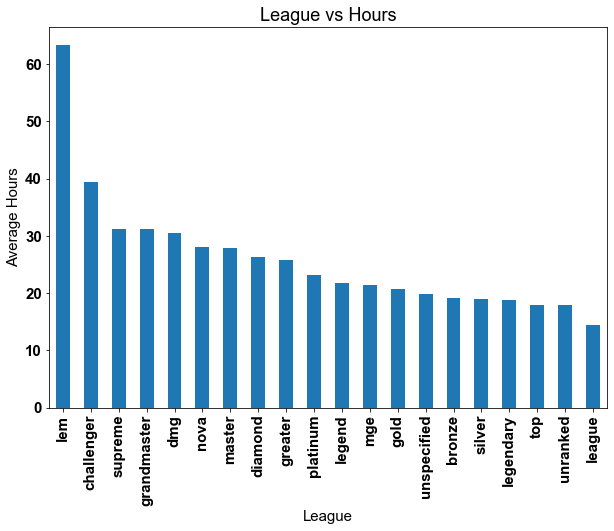

In [85]:
plt.figure(figsize=(10,7))
df.groupby('League').mean()['Hours'].sort_values(ascending=False).plot(kind='bar')
plt.title("League vs Hours")
plt.xlabel("League")
plt.ylabel("Average Hours")
plt.show()

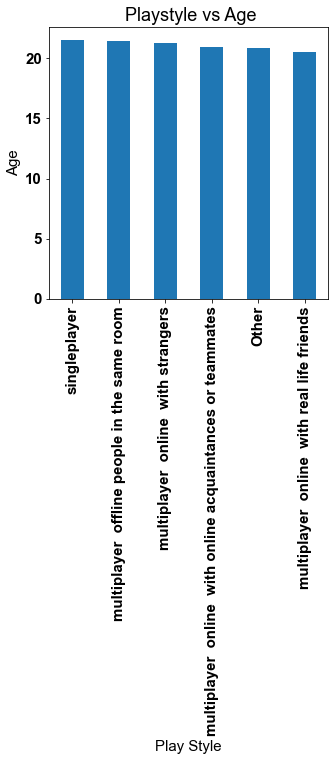

In [86]:
plt.figure(figsize=(5,5))
df.groupby('Playstyle')['Age'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title(" Playstyle vs Age")
plt.xlabel("Play Style")
plt.ylabel("Age");

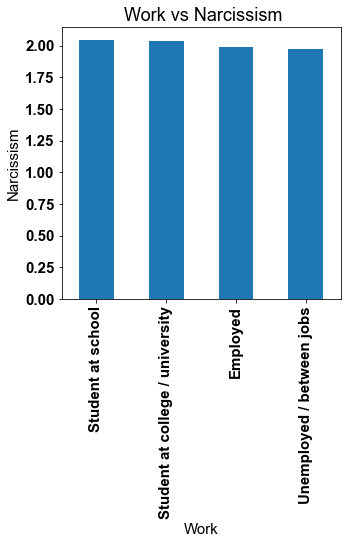

In [87]:
plt.figure(figsize=(5,5))
df.groupby('Work')['Narcissism'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title(" Work vs Narcissism")
plt.xlabel("Work")
plt.ylabel("Narcissism");

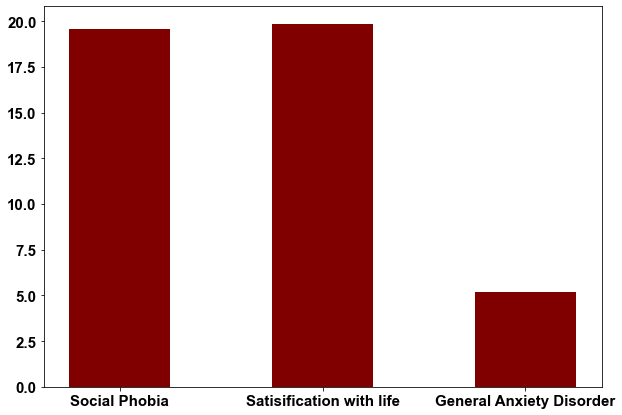

In [88]:
x=df.SPIN_T.mean()
y = df.SWL_T.mean()
z = df.GAD_T.mean()
c=[x,y,z]
plt.figure(figsize=(10,7))
plt.bar(['Social Phobia','Satisification with life','General Anxiety Disorder'],c,color ='maroon',
        width = 0.5)
plt.show()

C:\Users\Eyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

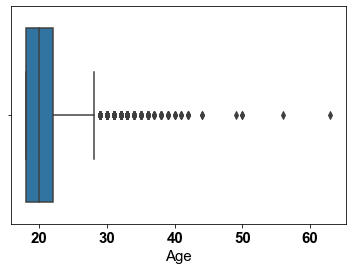

In [90]:
sns.boxplot(df['Age'])

C:\Users\Eyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours_streams'>

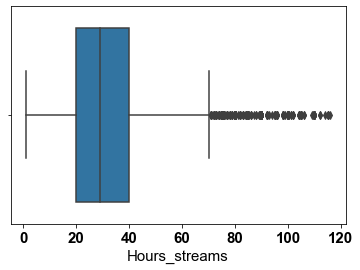

In [91]:
sns.boxplot(df['Hours_streams'])

### removing some outliers

In [92]:
df.drop( df[df['Hours_streams'] > 80].index , axis = 0 , inplace=True)

In [93]:
df.drop( df[df['Age'] > 35].index , axis = 0 , inplace=True)

## Label Encoding

In [94]:
le = LabelEncoder()

In [95]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [96]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Hours_streams
0,0,0,0,0,1,0,0,1,3,5,5,5,5,8,0,15.0,2,2,18,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,25,3,0,2,5,1,23,5.0,102,15.0
3,0,0,0,0,0,0,0,1,2,5,5,3,2,7,1,20.0,2,3,4,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1,28,0,0,2,2,0,17,11.0,102,25.0
4,2,1,2,2,2,3,2,3,2,2,4,5,1,7,0,20.0,2,2,18,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1,19,0,1,2,4,14,14,13.0,56,21.0
5,0,0,0,0,0,1,0,1,3,5,3,3,3,7,0,4.0,2,4,19,0.0,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1,24,0,0,2,3,1,17,13.0,102,4.0
6,0,0,0,0,0,0,0,1,3,4,4,3,2,7,1,30.0,2,4,4,8.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,1,29,0,1,2,2,0,16,26.0,102,38.0


## Feature Engineering

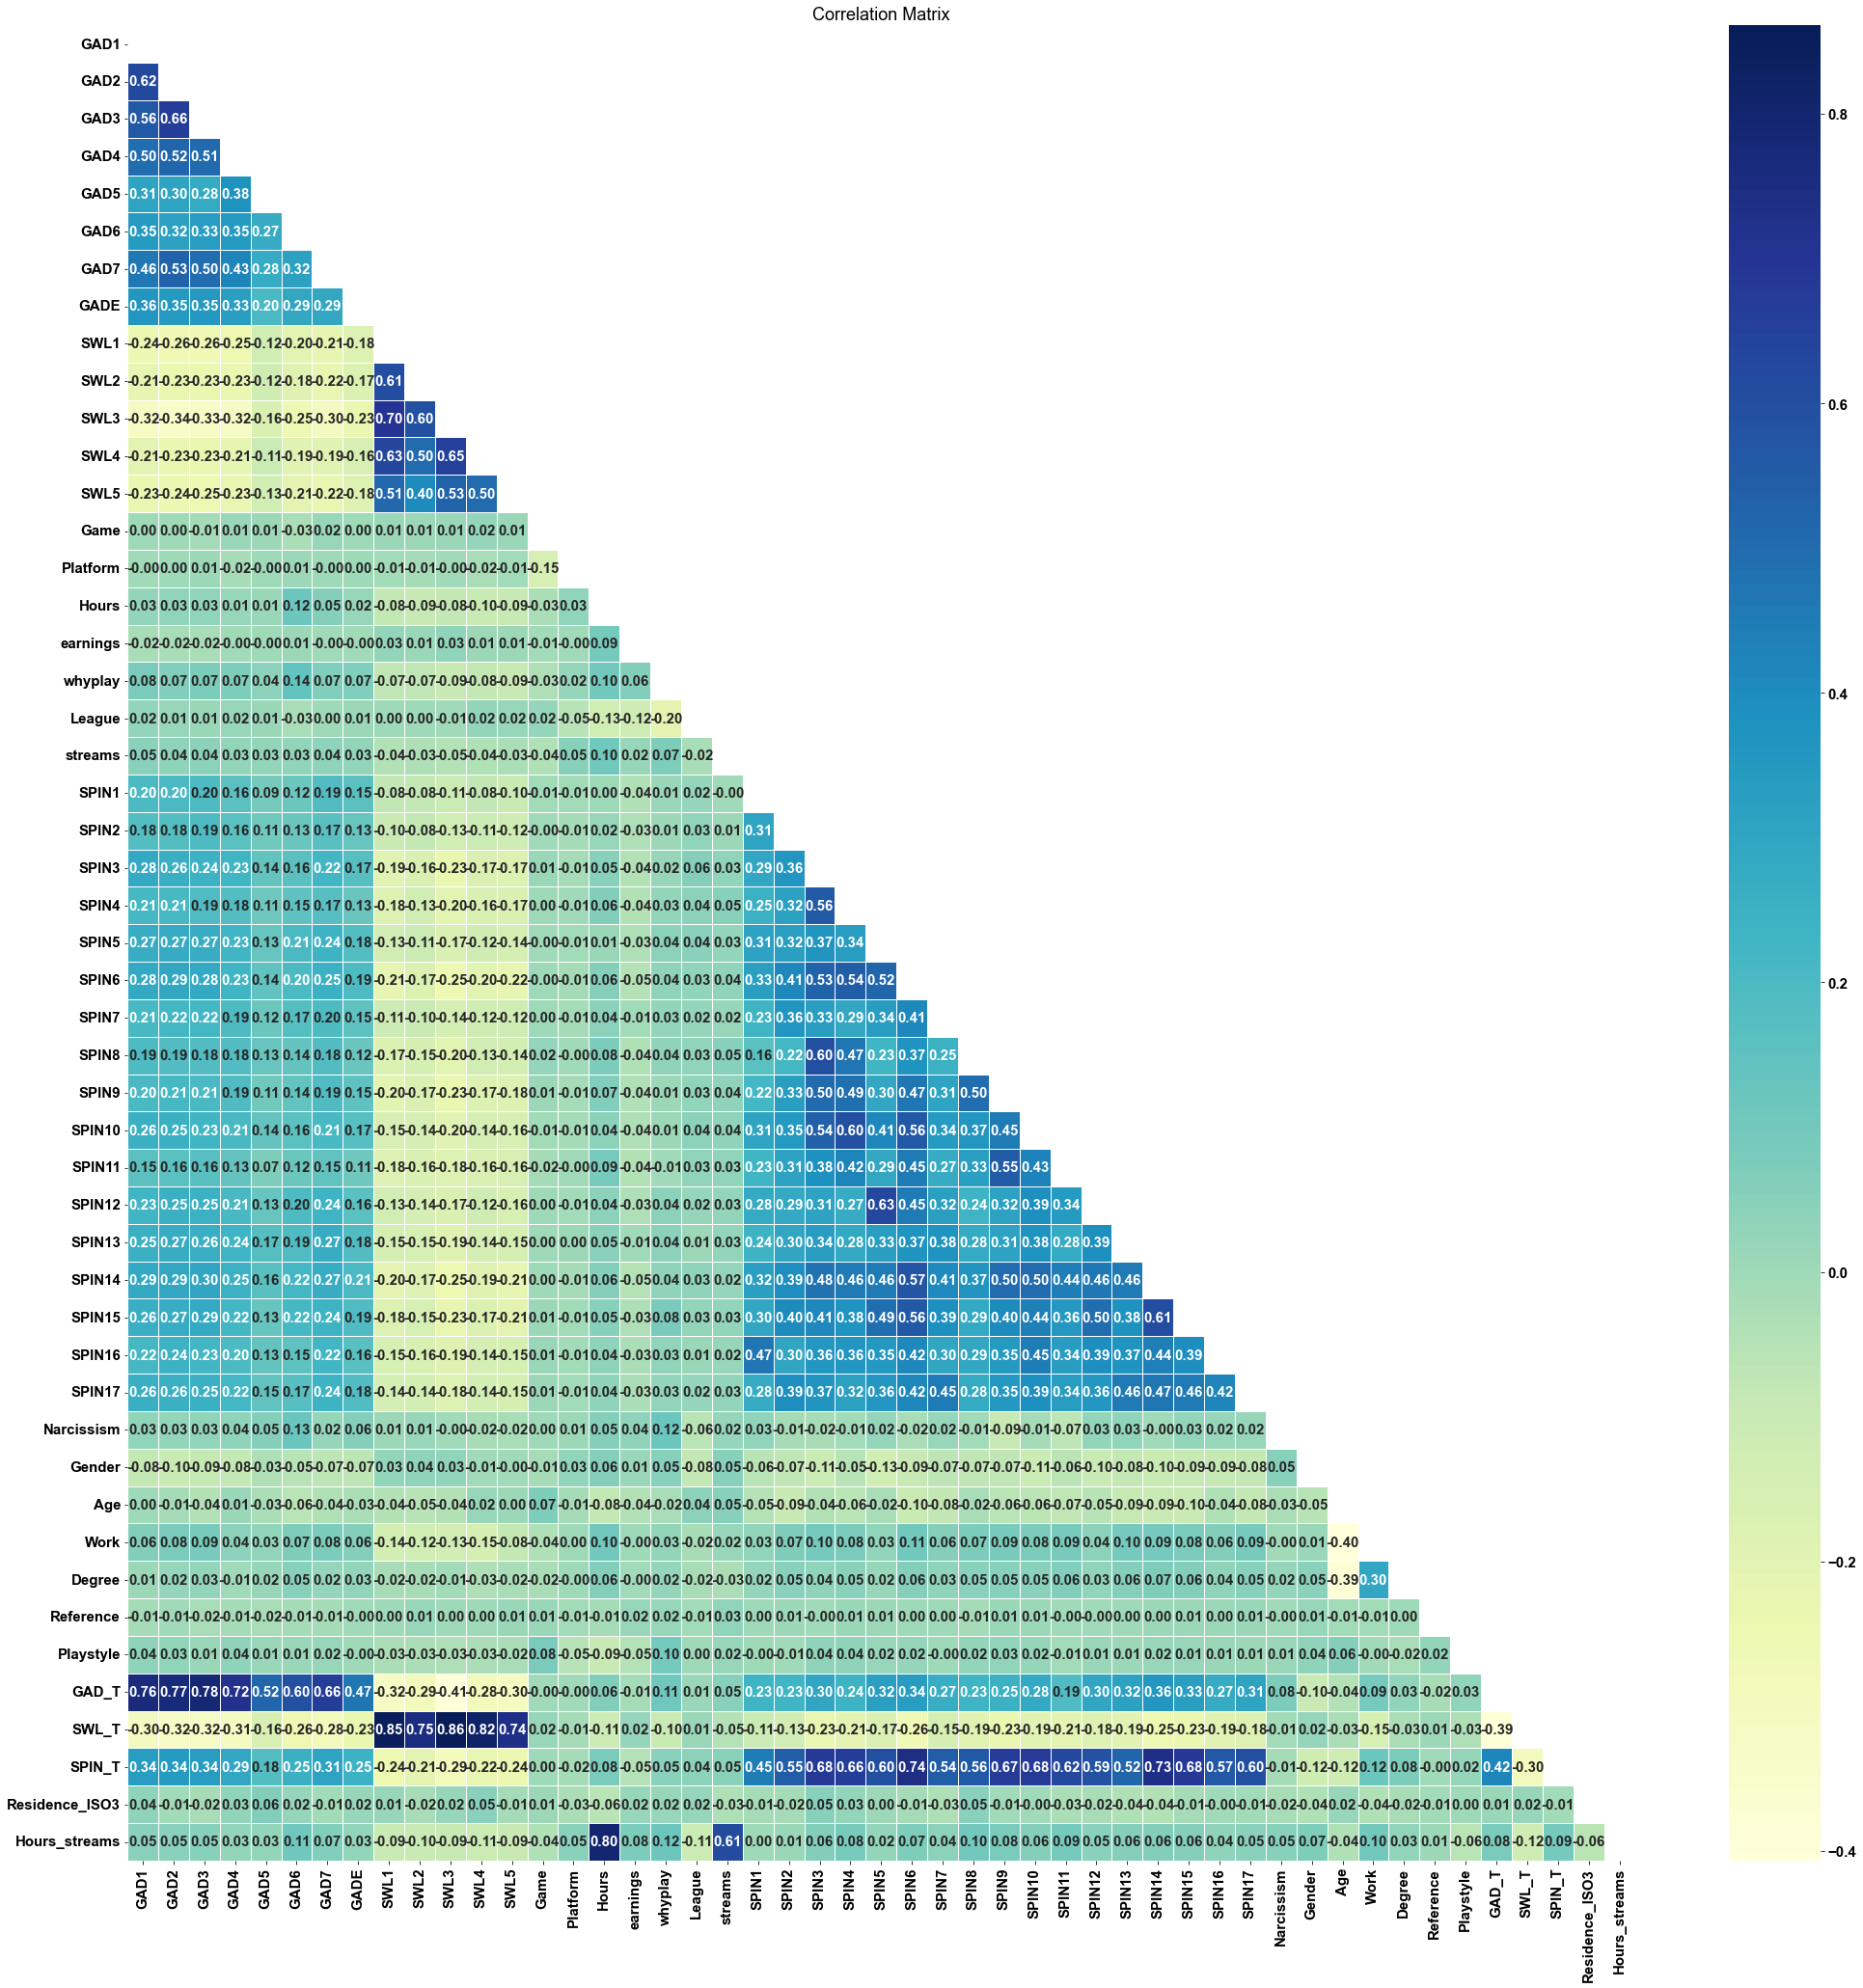

In [97]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [98]:
df.head(1)

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Hours_streams
0,0,0,0,0,1,0,0,1,3,5,5,5,5,8,0,15.0,2,2,18,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,25,3,0,2,5,1,23,5.0,102,15.0


In [ ]:
# df.drop(['Hours','streams','Residence_ISO3' , 'Reference' , 'League' , 'GAD_T' , 'SWL_T' , 'SPIN_T'],axis=1,inplace=True)

In [99]:
df = df[['GAD_T' , 'SWL_T' , 'SPIN_T'  , 'Narcissism' , 'Age' ]]

In [100]:
df.head()

,GAD_T,SWL_T,SPIN_T,Narcissism,Age
0,1,23,5.0,1.0,25
3,0,17,11.0,2.0,28
4,14,14,13.0,1.0,19
5,1,17,13.0,2.0,24
6,0,16,26.0,2.0,29


In [101]:
df.dtypes

GAD_T           int64
SWL_T           int64
SPIN_T        float64
Narcissism    float64
Age             int64
dtype: object

In [102]:
pc = PCA(n_components=3)

In [103]:
x = pc.fit_transform(df)

### Elbow method to determine number of clusters

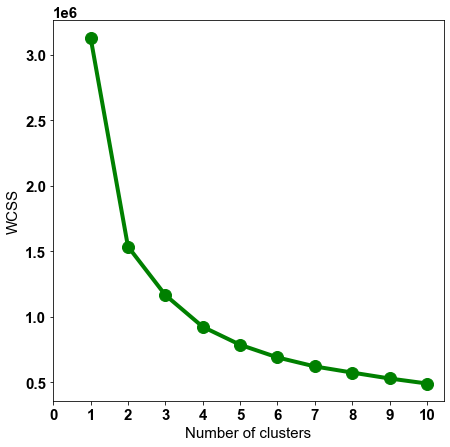

In [104]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_) #inertia --> error
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### Clustering to 3 different groups

In [105]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 25, random_state = 0)
y_clusters = model.fit_predict(x)

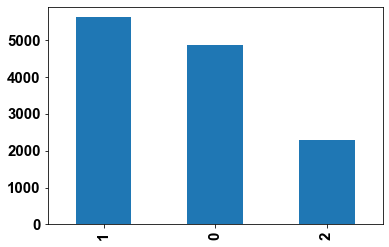

In [106]:
pd.Series(y_clusters).value_counts().plot(kind='bar');

In [ ]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "Cluster 1")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "Cluster 2")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'black', label = "Cluster 3")


ax.set_xlabel('PCA Cluster 1-->')
ax.set_ylabel('PCA Cluster 2-->')
ax.set_zlabel('PCA Cluster 3-->')
ax.legend()
plt.show()

### Adding label column to train our model for predicting in which group you are

In [ ]:
df['Label'] = y_clusters

In [ ]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".3f")
cormat.set_title('Correlation Matrix')
plt.show()

#### Checking if our data is unbalanced

In [ ]:
plt.rcParams.update({'font.size': 12})

In [ ]:
df['Label'].value_counts()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### Splitting data to train and test

In [ ]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size=.8,random_state=44)

In [ ]:
X_train

### Try to get insights from our clustered group

In [ ]:
l1 = df[df['Label'] == 0]['GAD_T'].mean()
l2 = df[df['Label'] == 0]['SWL_T'].mean()
l3 = df[df['Label'] == 0]['SPIN_T'].mean()

c=[l1,l2,l3]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T'],c,color ='maroon',width = 0.5)
plt.show()

In [ ]:
l1 = df[df['Label'] == 1]['GAD_T'].mean()
l2 = df[df['Label'] == 1]['SWL_T'].mean()
l3 = df[df['Label'] == 1]['SPIN_T'].mean()

c=[l1,l2,l3]

plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T'],c,color ='maroon',width = 0.5)
plt.show()

In [ ]:
l1 = df[df['Label'] == 2]['GAD_T'].mean()
l2 = df[df['Label'] == 2]['SWL_T'].mean()
l3 = df[df['Label'] == 2]['SPIN_T'].mean()

c=[l1,l2,l3]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T'],c,color ='maroon',width = 0.5)
plt.show()

In [ ]:
# # '''
# # Observations : 

# #         GAD, SWL  , SPIN
# # Label 0: 6 , 17.5 ,  22  -> Have Social phobia but happy with it 
# # Label 1: 3 , 24   ,  9   -> Have Normal life
# # Label 2: 9 , 16   ,  42  -> Have very high social phobia which affects your satisfication with life
# # '''

### Random forest classification modelling

In [ ]:
clf = RandomForestClassifier(n_estimators = 500 , random_state=30, max_depth=8) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
clf.score(X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

In [ ]:
confusion_matrix(y_pred,y_test)

#### Model evaluation

In [ ]:
answer = clf.predict(X_test.iloc[30:45,:])
print(list(answer))
print(y_test.iloc[30:45].to_list())

### Logistic regression modelling , evaluation

In [ ]:
lc = LogisticRegression()
lc.fit(X_train,y_train)
lc_pred = lc.predict(X_test)
accuracy_score(lc_pred,y_test)

### Hyper parameter tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV
# rf = RandomForestClassifier()
# param = {
#     "n_estimators" : [100 , 250 , 500 , 1000 , 2000],
#     'max_depth': [5 , 7 ,9 ,12],
#     'min_samples_split': [50] ,
#     'min_samples_leaf':[100],
#     'n_jobs':[-1],
#     'random_state':[44]
# }
# grid = GridSearchCV(rf,param, cv=10)
# grid.fit(X_train,y_train)
# grid_pred = grid.predict(X_test)
# accuracy_score(grid_pred,y_test)
# grid.best_estimator_

###  After trying HyperParameter Tuning and Logistsic Regression , The best model is RF without any changes

#### Saving model

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open("RandomForestClass.sav",'wb'))

In [ ]:
# X_ps = df.drop(['earnings' , 'whyplay' , 'Playstyle'] , axis = 1)
# df['new_PS'] = df.Playstyle.replace(df.Playstyle.value_counts().index[5:] , 'Other')
# y_ps = df.new_PS
# y_ps.unique()
# X_ps_test = X_ps.loc[y_ps[y_ps == 'Other'].index , :]
# X_ps.drop(y_ps[y_ps == 'Other'].index , axis = 0 , inplace=True)
# y_ps_test = y_ps.loc[y_ps[y_ps == 'Other'].index]
# y_ps.drop(y_ps[y_ps == 'Other'].index , axis = 0 , inplace=True)
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import SVC
# leY =LabelEncoder()
# le =LabelEncoder()
# for i in X_ps:
#     if X_ps[i].dtype == 'object':
#         X_ps[i]=le.fit_transform(X_ps[i])
#         X_ps_test[i]=le.transform(X_ps_test[i])
# y_ps = leY.fit_transform(y_ps)
# y_ps_test = np.nan
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# X_train , X_test , y_train , y_test = train_test_split(X_ps, y_ps , test_size=0.2 , random_state=44)
# rf = SVC(C=0.7 , kernel='poly' , degree=2)
# rf.fit(X_train, y_train)
# rf.score(X_train, y_train)
# rf.score(X_test, y_test)